Preprocess 3: PSF
=================

The Point Spread Function (PSF) describes blurring due the optics of your dataset`s telescope. It is used by PyAutoLens
when fitting a dataset to include these effects, such that does not bias the lens model. It should be estimated from a
stack of stars in the image during data reduction or using PSF simulator technology suited to your telescope.

This tutorial describes preprocessing your dataset`s psf to adhere too the units and formats required by PyAutoLens.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

#%matplotlib
from os import path
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


Setup the path the datasets we'll use to illustrate preprocessing, which is the folder `dataset/imaging/preprocess`.

In [2]:
dataset_path = path.join("dataset", "imaging", "preprocess")

__Loading Data From Individual Fits Files__

First, lets load a PSF as a Kernel2D. This psf represents a good data-reduction that conforms to the formatting 
standards I describe in this tutorial!

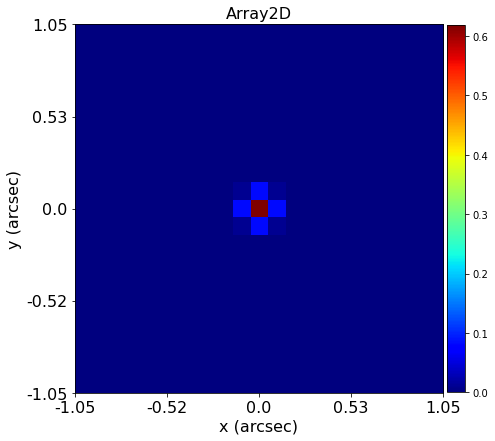

In [3]:
imaging_path = path.join(dataset_path, "imaging")

psf = al.Kernel2D.from_fits(
    file_path=path.join(imaging_path, "psf.fits"), hdu=0, pixel_scales=0.1
)

array_plotter = aplt.Array2DPlotter(array=psf)
array_plotter.figure_2d()

__1) PSF Size__

The majority of PSF blurring occurs at its central core, which is the most important region for strong lens modeling. 
By default, the size of the PSF kernel in the .fits is used to perform convolution. The larger this stamp, the longer 
this convolution will take to run. Large PSFs (e.g. > 51 x 51) could have significantly slow down on run-time. In general, 
we would recommend the PSF size is 21 x 21. 

Lets look at an image where a large PSF kernel is loaded.

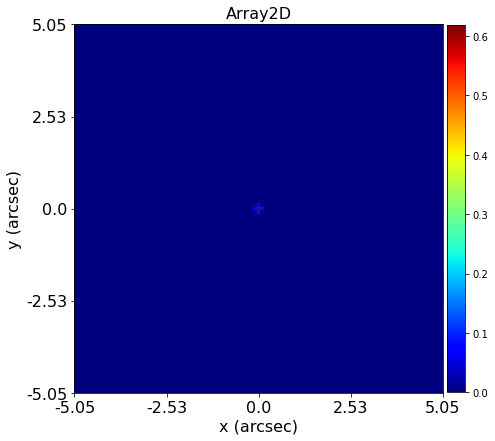

In [4]:
imaging_path = path.join(dataset_path, "imaging_with_large_psf")

large_psf = al.Kernel2D.from_fits(
    file_path=path.join(imaging_path, "psf.fits"), hdu=0, pixel_scales=0.1
)

array_plotter = aplt.Array2DPlotter(array=large_psf)
array_plotter.figure_2d()

We can resize a psf the same way that we resize an image.

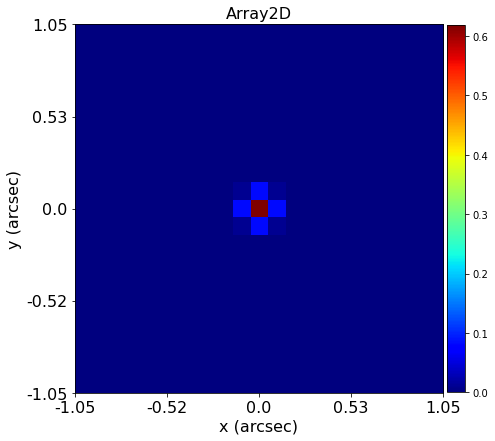

In [5]:
trimmed_psf = al.preprocess.array_with_new_shape(array=psf, new_shape=(21, 21))

array_plotter = aplt.Array2DPlotter(array=trimmed_psf)
array_plotter.figure_2d()

__PSF Dimensions__

The PSF dimensions must be odd x odd (e.g. 21 x 21), because even-sized PSF kernels introduce a half-pixel offset in 
the convolution routine which can lead to systematics in the lens analysis. 

(22, 22)


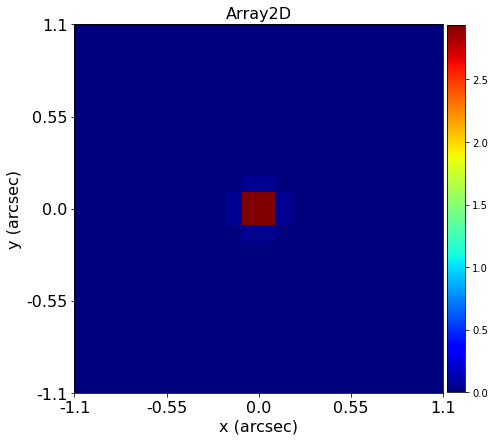

In [6]:
imaging_path = path.join(dataset_path, "imaging_with_even_psf")

even_psf = al.Kernel2D.from_fits(
    file_path=path.join(imaging_path, "psf.fits"), hdu=0, pixel_scales=0.1
)

print(even_psf.shape_native)

array_plotter = aplt.Array2DPlotter(array=even_psf)
array_plotter.figure_2d()

Below, we show a function that allows one to rescale the PSF to the nearest odd-sized kernel. However, this uses an 
interpolation routine that will not be perfect. The best way to create an odd-sized PSF is to do so directly in your
data reduction procedure. If this is a possibility, DO THAT INSTEAD OF USING THE FUNCTION BELOW!

(21, 21)


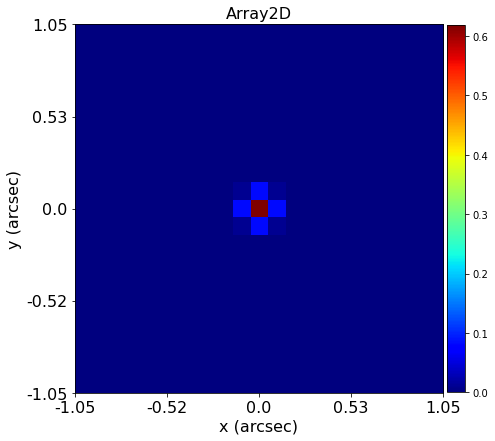

In [7]:
odd_psf = al.preprocess.psf_with_odd_dimensions_from_psf(psf=psf)

print(odd_psf.shape_native)

array_plotter = aplt.Array2DPlotter(array=odd_psf)
array_plotter.figure_2d()

__PSF Normalization__

The PSF should also be normalized to unity. That is, the sum of all values in the kernel used by PyAutoLens should sum 
to 1. This ensures that the PSF convolution does not change the overall normalization of the image.

PyAutoLens automatically normalized PSF when they are passed into a Imaging or SimulatedImaging object, so you 
do not actually need to normalize your PSF. However, it is better to do it now, just in case.

Lets look at a PSF which is not normalized to unity, which is the default case corresponding to the `normalize` flag 
being False.

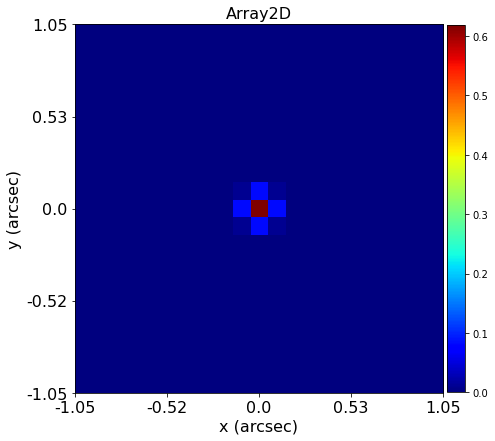

In [8]:
imaging_path = path.join(dataset_path, "imaging_with_unnormalized_psf")

unnormalized_psf = al.Kernel2D.from_fits(
    file_path=path.join(imaging_path, "psf.fits"),
    hdu=0,
    pixel_scales=0.1,
    normalize=False,
)

array_plotter = aplt.Array2DPlotter(array=unnormalized_psf)
array_plotter.figure_2d()

The PSF is renormaized if the normalize=True.

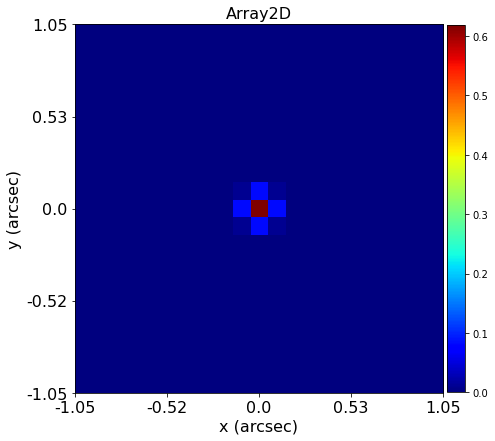

In [9]:
normalized_psf = al.Kernel2D.from_fits(
    file_path=path.join(imaging_path, "psf.fits"),
    hdu=0,
    pixel_scales=0.1,
    normalize=True,
)

array_plotter = aplt.Array2DPlotter(array=normalized_psf)
array_plotter.figure_2d()
